# Assignment 1.2 : Logistic Regression with multiple features

## AI (Ojaswi Banskota) ACE079BCT040


## 1) Required Dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

## 2) Data Retrieval and Collection
 -  Data retrieval and collection is the first step in any ML pipeline, involving gathering relevant raw data from diverse sources such as databases,   APIs, sensors, and third-party providers.
 - Good collection practices ensure the data is representative, timely, and accompanied by metadata that supports reproducibility and traceability.
-  Attention to data quality, privacy, and legal constraints during collection helps prevent bias and compliance issues later in the pipeline.
 - Well-documented and structured retrieval workflows reduce downstream cleaning effort and improve model reliability.

In [4]:
 df = pd.read_csv("Heart_Disease_Prediction.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Heart_Disease_Prediction.csv'

In [1]:
df

NameError: name 'df' is not defined

In [37]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [38]:
# Separate features and target
features_multi = df.drop(columns=['Heart Disease'])
labels_multi = df['Heart Disease']

# Convert categorical variables to numeric using one-hot encoding
features_multi_encoded = pd.get_dummies(features_multi, drop_first=True)

# Standardize numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_multi_scaled = pd.DataFrame(
    scaler.fit_transform(features_multi_encoded),
    columns=features_multi_encoded.columns
)

# Preview the first 5 rows
features_multi_scaled.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706


**Explanation:**  
- Categorical variables (e.g., Sex, Chest pain type) are converted to numeric using **one-hot encoding**.  
- Standardization ensures numeric features are on the same scale for better model convergence.  
- Using all features may improve performance because the model can consider multiple factors simultaneously, e.g., Age, BP, Cholesterol, and exercise angina together.


In [39]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [40]:
# Input features: all columns except target
features_multi = df.drop(columns=['Heart Disease'])

# Target variable
labels_multi = df['Heart Disease']  # string column like 'Presence'/'Absence'

# Convert target to numeric (0 = Absence, 1 = Presence)
labels_numeric_multi = labels_multi.map({'Absence': 0, 'Presence': 1})

# Preview first 5 rows
features_multi.head(), labels_numeric_multi.head()


(   Age  Sex  Chest pain type   BP  ...  ST depression  Slope of ST  Number of vessels fluro  Thallium
 0   70    1                4  130  ...            2.4            2                        3         3
 1   67    0                3  115  ...            1.6            2                        0         7
 2   57    1                2  124  ...            0.3            1                        0         7
 3   64    1                4  128  ...            0.2            2                        1         7
 4   74    0                2  120  ...            0.2            1                        1         3
 
 [5 rows x 13 columns],
 0    1
 1    0
 2    1
 3    0
 4    0
 Name: Heart Disease, dtype: int64)

## 3) Data Cleaning

In [41]:
# Check for missing values
missing_values = features_multi.isnull().sum()
print("Missing values per feature:\n", missing_values)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)

# Check unique values for categorical columns
categorical_cols = features_multi.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}': {features_multi[col].unique()}")


Missing values per feature:
 Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
dtype: int64

Number of duplicate rows: 0


### Data Cleaning Steps

- **Missing Values**: Ensure there are no missing values in features. If any, they must be handled via imputation or removal.  
- **Duplicate Rows**: Detect and remove duplicate entries to avoid bias in model training.  
- **Categorical Consistency**: Check unique values in categorical columns to ensure consistent categories (e.g., 'Male' vs 'male').  

**Note:**  
- For this dataset, after encoding categorical variables using one-hot encoding, missing values are automatically handled if all categories are present.  
- Duplicate rows can be removed if necessary using `df.drop_duplicates()`.  
- Data cleaning ensures the model receives **clean, consistent, and numeric input** for training.


## 4) Feature Design

In [42]:
# --- Step 1: Encode categorical variables ---
# Identify categorical columns
categorical_cols = features_multi.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

# Apply one-hot encoding (drop_first=True avoids multicollinearity)
features_encoded = pd.get_dummies(features_multi, drop_first=True)

# Preview encoded features
features_encoded.head()


Categorical columns: []


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


### 4.1 Feature Transformation (Encoding)
- Convert **categorical variables** into numeric format so the model can process them.  
- Example: `Sex` column → `Sex_Male` (0 = Female, 1 = Male).  
- `drop_first=True` avoids multicollinearity by removing the first category of each variable.  
- Ensures the dataset contains **only numeric columns** suitable for logistic regression.


In [43]:
# --- Step 2: Scale numeric features ---
from sklearn.preprocessing import StandardScaler

# Standardize features: mean = 0, std = 1
scaler = StandardScaler()
features_scaled = pd.DataFrame(
    scaler.fit_transform(features_encoded),
    columns=features_encoded.columns
)

# Preview first 5 rows of scaled features
features_scaled.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706


### 4.2 Feature Transformation (Scaling)
- Numeric features are standardized to have **mean 0 and standard deviation 1**.  
- Benefits:  
  - Improves convergence speed of logistic regression.  
  - Ensures all features contribute equally to the model.  
- Applied **after encoding categorical variables**.


In [44]:
# --- Step 3 : Feature Engineering ---
# Example: create a ratio feature (Age / BP) to capture potential risk
features_scaled['Age_BP_Ratio'] = features_multi['Age'] / features_multi['BP']

# Preview engineered features
features_scaled.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Age_BP_Ratio
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706,0.538462
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277,0.582609
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277,0.459677
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277,0.500000
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706,0.616667


### 4.3 Feature Engineering
- New features can be created from existing ones to capture **useful relationships**.  
- Example: `Age_BP_Ratio` may indicate patients with high age and high BP are at higher risk.  
- Simple engineered features often improve model performance more than complex transformations.


In [45]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
# 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(
    features_scaled,      # all features after encoding and scaling
    labels_numeric_multi, # numeric target (0 = Absence, 1 = Presence)
    test_size=0.2,        # 20% for testing
    shuffle=True,         # shuffle data to avoid bias
    random_state=42       # reproducibility
)

# Verify the shapes
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (216, 14)
x_test shape: (54, 14)
y_train shape: (216,)
y_test shape: (54,)


### Train-Test Split

- The dataset is divided into **training (80%)** and **test (20%)** sets.  
- **Shuffling** ensures the data is randomly distributed and avoids bias.  
- **Random state** ensures that the split is reproducible.  
- **Training set**: used to fit the logistic regression model.  
- **Test set**: used to evaluate the model’s performance on unseen data.


## 5) Algorithm Selection

- **Algorithm Chosen:** Logistic Regression  
- **Reason:** Logistic Regression is a **binary classification algorithm** that predicts the probability of an event (heart disease) based on input features.  
- Using multiple features allows the model to capture more relationships and improve prediction accuracy compared to using a single feature.

### How Logistic Regression Works

- Logistic Regression calculates the probability of the positive class using the **sigmoid function**:

$$
P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
$$

Where:  
- $X_1, X_2, ..., X_n$ → input features (e.g., Age, BP, Cholesterol, etc.)  
- $\beta_0$ → intercept  
- $\beta_1 ... \beta_n$ → coefficients for each feature

- Each coefficient shows the **impact of that feature** on the probability of heart disease.  
- Using multiple features helps the model learn more complex patterns that cannot be captured by a single feature.


In [46]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize the model for multiple features
# max_iter increased to ensure convergence with many features
model_multi = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model_multi.fit(x_train, y_train)
y_pred_multi = model_multi.predict(x_test)


# Model is now trained and ready for predictions


### Notes

- Logistic Regression works for multiple numeric features after encoding and scaling.  
- The `max_iter=1000` ensures the optimization algorithm converges, especially when using many features.  
- After fitting, the model learns the coefficients (`beta_1 ... beta_n`) that relate each feature to the probability of heart disease.


## 6) Loss function selection

### Loss Function Selection

- **Algorithm:** Logistic Regression (binary classification)  
- **Objective:** Minimize a loss function that measures how far the model’s predictions are from the actual labels.  

- **Chosen Loss Function:** Binary Cross-Entropy (also called **Log Loss**)

$$
Loss = - \frac{1}{N} \sum_{i=1}^{N} \Big[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \Big]
$$

Where:  
- \(N\) → number of samples  
- \(y_i\) → true label (0 = Absence, 1 = Presence)  
- \(\hat{y}_i\) → predicted probability that \(y_i = 1\)  

- **Interpretation:**  
  - Penalizes confident wrong predictions more heavily than less confident ones.  
  - Minimizing this loss makes the model’s predicted probabilities close to the true labels.  
- Logistic Regression automatically uses this loss function during training.


In [47]:
from sklearn.metrics import log_loss

# Predicted probabilities for class 1
y_pred_proba_multi = model_multi.predict_proba(x_test)[:, 1]

# Compute log loss
loss = log_loss(y_test, y_pred_proba_multi)
print("Binary Cross-Entropy (Log Loss) on test set:", loss)


Binary Cross-Entropy (Log Loss) on test set: 0.3166636619998831


- Log Loss quantifies how well the predicted probabilities match the true labels.  
- Lower Log Loss indicates better model performance.  
- This metric complements accuracy and F1-score in evaluating the model.


## 7) Model learning (training)

In [48]:
# --- Model Training ---
# The Logistic Regression model has already been initialized (model_multi)
# Fit the model on the training data
model_multi.fit(x_train, y_train)

# --- Model Prediction ---
# Predict class labels on the test set
y_pred_multi = model_multi.predict(x_test)

# Predict probabilities for class 1 (needed for Log Loss or sigmoid plot)
y_pred_proba_multi = model_multi.predict_proba(x_test)[:, 1]


### Model Learning

- **What is Model Learning?**
  - Model learning refers to fitting the machine learning algorithm to the **training data**.  
  - For Logistic Regression, the model learns the coefficients (\(\beta_1, \beta_2, ..., \beta_n\)) and intercept (\(\beta_0\)) that best map input features to the probability of heart disease.

- **How it works (Multiple Features):**
  - Logistic Regression uses the **sigmoid function**:

$$
\hat{y} = P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
$$

  - The model minimizes the **Binary Cross-Entropy Loss**:

$$
Loss = - \frac{1}{N} \sum_{i=1}^{N} \Big[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \Big]
$$

- **Training Steps for Task 2:**
  1. Use the **training set** (80% of data) for fitting the model.  
  2. Input features are **all scaled and encoded** variables.  
  3. Model adjusts its coefficients to **reduce the loss** until convergence.  
  4. After training, the model is ready to **predict on the test set**.


In [49]:
# Inspect the learned coefficients
coefficients = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': model_multi.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coefficients


,Feature,Coefficient
11,Number of vessels fluro,0.825756
1,Sex,0.643098
2,Chest pain type,0.622917
12,Thallium,0.568892
9,ST depression,0.501893
3,BP,0.429804
8,Exercise angina,0.377452
10,Slope of ST,0.339154
4,Cholesterol,0.286376
6,EKG results,0.067198


- The **coefficients** indicate the impact of each feature on the probability of heart disease.  
- Positive coefficients increase the probability, negative coefficients decrease it.  
- This helps interpret which features contribute most to risk prediction.


## 8) Model Evaluation

In [50]:
# --- Model Evaluation ---
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

# Accuracy
accuracy_multi = accuracy_score(y_test, y_pred_multi)
print("Accuracy on test set:", accuracy_multi)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_multi)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report (Precision, Recall, F1-score)
class_report = classification_report(y_test, y_pred_multi)
print("\nClassification Report:")
print(class_report)

# Log Loss (Binary Cross-Entropy)
loss_multi = log_loss(y_test, y_pred_proba_multi)
print("\nBinary Cross-Entropy (Log Loss):", loss_multi)


Accuracy on test set: 0.9074074074074074

Confusion Matrix:
[[31  2]
 [ 3 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54


Binary Cross-Entropy (Log Loss): 0.3166636619998831


In [53]:
from sklearn.metrics import f1_score, recall_score, precision_score

# Calculate F1-score, recall, and precision for the positive class (heart disease)
f1_multi = f1_score(y_test, y_pred_multi)
recall_multi = recall_score(y_test, y_pred_multi)
precision_multi = precision_score(y_test, y_pred_multi)

print("Task 2 (Multiple Features) Metrics:")
print("F1-score:", f1_multi)
print("Recall:", recall_multi)
print("Precision:", precision_multi)


Task 2 (Multiple Features) Metrics:
F1-score: 0.8780487804878049
Recall: 0.8571428571428571
Precision: 0.9


### Model Evaluation

- **Accuracy:** Proportion of correctly classified patients.  
- **Confusion Matrix:**  
  - True Positives (TP): correctly predicted presence of heart disease.  
  - True Negatives (TN): correctly predicted absence.  
  - False Positives (FP): predicted presence when absent.  
  - False Negatives (FN): predicted absence when present.  
- **Classification Report:** Includes **Precision, Recall, and F1-score** for each class:  
  - **Precision:** How many predicted positives are correct.  
  - **Recall:** How many actual positives were correctly predicted.  
  - **F1-score:** Harmonic mean of precision and recall.  
- **Log Loss:** Measures how well the predicted probabilities match the true labels. Lower is better.


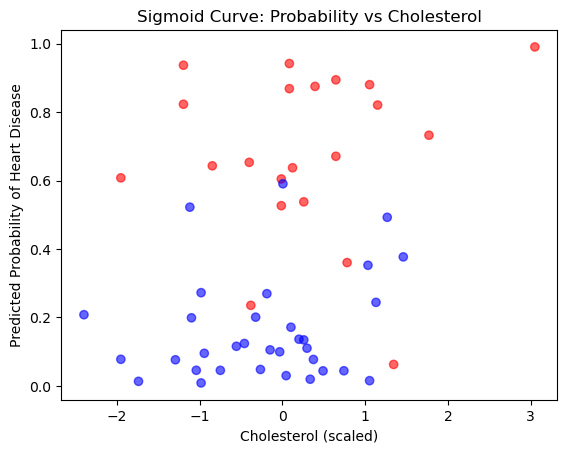

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Example: sigmoid probability vs. one feature (like Cholesterol)
cholesterol_test = x_test['Cholesterol'].values
sigmoid_prob = y_pred_proba_multi

plt.scatter(cholesterol_test, sigmoid_prob, c=y_test, cmap='bwr', alpha=0.6)
plt.xlabel('Cholesterol (scaled)')
plt.ylabel('Predicted Probability of Heart Disease')
plt.title('Sigmoid Curve: Probability vs Cholesterol')
plt.show()


### Notes:

- The scatter plot shows how the predicted probability increases with the feature (Cholesterol in this example).  
- Red points = actual presence of heart disease, Blue points = absence.  
- Using multiple features, the model combines all coefficients to predict probabilities.  
- Performance metrics (Accuracy, F1-score, Log Loss) help determine if the model generalizes well on unseen data.
